In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,InputLayer,Conv2D,AveragePooling2D,Flatten, Add, GlobalAveragePooling2D,Input, BatchNormalization, Activation
from keras.utils import to_categorical
from tensorflow.keras import regularizers
import os
from tensorflow.keras import Model


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train), (X_test, y_test) = data
print(y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000,)


In [3]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train ,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.1)
print(y_test.shape ,x_val.shape,y_train.shape,y_val.shape)

(10000, 10) (6000, 784) (54000, 10) (6000, 10)


mnist with simple network

In [4]:

nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(28*28,)))
nn_model.add(Dense(100, activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
nn_model.add(Dense(100, activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))

nn_model.add(Dense(10,activation='softmax'))
nn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
m1=nn_model.fit(x=X_train,y=y_train,epochs=100,batch_size= 128,validation_data=(x_val,y_val))

Epoch 1/100
422/422 [==============================] - 6s 4ms/step - loss: 0.3625 - categorical_accuracy: 0.8972 - val_loss: 0.1919 - val_categorical_accuracy: 0.9415
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1478 - categorical_accuracy: 0.9573 - val_loss: 0.1405 - val_categorical_accuracy: 0.9570
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1044 - categorical_accuracy: 0.9696 - val_loss: 0.1186 - val_categorical_accuracy: 0.9633
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0776 - categorical_accuracy: 0.9768 - val_loss: 0.1118 - val_categorical_accuracy: 0.9635
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0622 - categorical_accuracy: 0.9811 - val_loss: 0.0967 - val_categorical_accuracy: 0.9700
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0509 - categorical_accuracy: 0.9851 - val_loss: 0.1015 - val_categorical_accuracy: 0.968

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


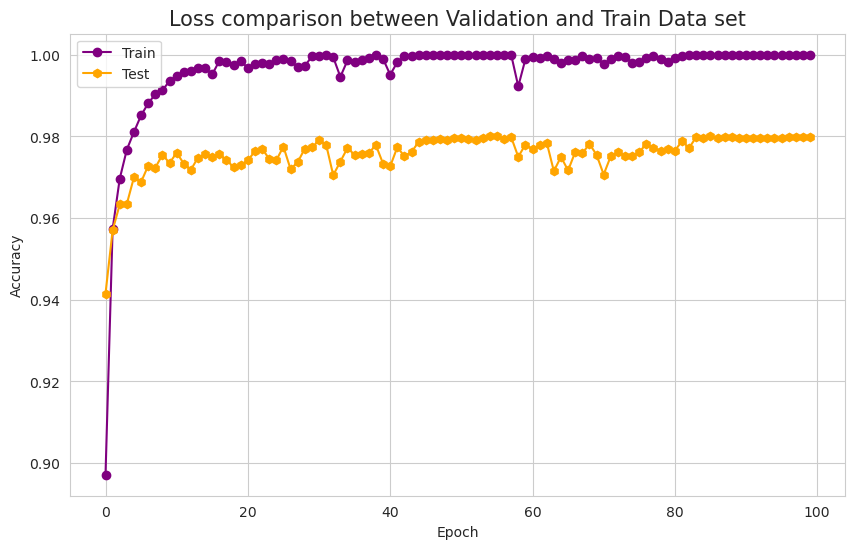

In [5]:
nn_model.summary()
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['categorical_accuracy'],color="Purple",marker='o')
plt.plot(m1.history['val_categorical_accuracy'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

leNet-5

In [6]:
(X_train, y_train), (X_test, y_test) = data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train ,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.1)
print(y_test.shape)

(10000, 10)


In [7]:
lenet_model = Sequential()
lenet_model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation = 'relu', input_shape = (28,28,1)))
lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
lenet_model.add(Conv2D(filters=16,kernel_size=(5,5),activation = 'relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
lenet_model.add(Flatten())
lenet_model.add(Dense(120, activation='relu'))
lenet_model.add(Dense(10, activation='softmax'))
lenet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
m2= lenet_model.fit(x=X_train,y=y_train,epochs=100,batch_size= 128,validation_data=(x_val,y_val))

Epoch 1/100
422/422 [==============================] - 7s 5ms/step - loss: 0.3966 - categorical_accuracy: 0.8819 - val_loss: 0.1242 - val_categorical_accuracy: 0.9640
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1060 - categorical_accuracy: 0.9686 - val_loss: 0.0766 - val_categorical_accuracy: 0.9767
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0757 - categorical_accuracy: 0.9775 - val_loss: 0.0672 - val_categorical_accuracy: 0.9795
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0606 - categorical_accuracy: 0.9814 - val_loss: 0.0585 - val_categorical_accuracy: 0.9815
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0517 - categorical_accuracy: 0.9847 - val_loss: 0.0505 - val_categorical_accuracy: 0.9822
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0444 - categorical_accuracy: 0.9863 - val_loss: 0.0432 - val_categorical_accuracy: 0.986

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

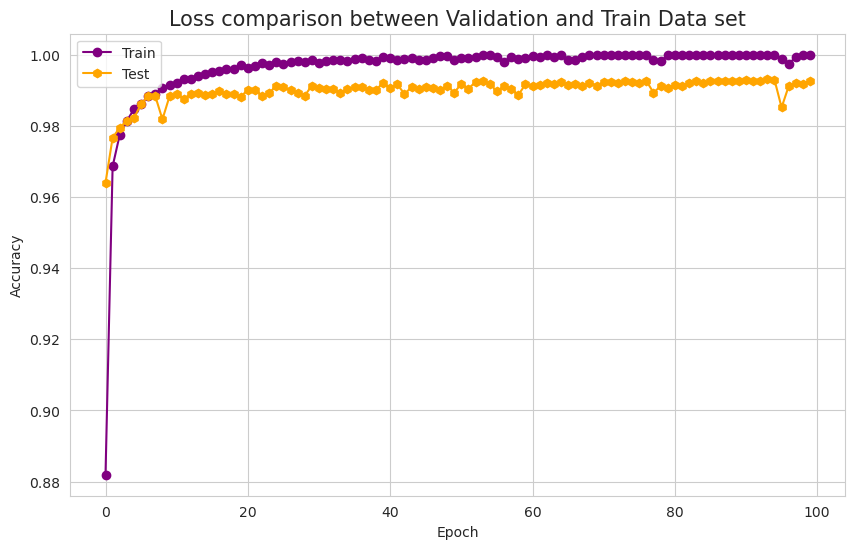

313/313 [==============================] - 1s 3ms/step - loss: 0.0489 - categorical_accuracy: 0.9912
[0.04889066517353058, 0.9911999702453613]


In [8]:
lenet_model.summary()
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['categorical_accuracy'],color="Purple",marker='o')
plt.plot(m2.history['val_categorical_accuracy'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(lenet_model.evaluate(X_test,y_test))

resnet

In [9]:
def resblock(x,filters):
  x_skip = x
  x = Conv2D(filters,kernel_size=(3,3),padding='same',strides=2)(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)
  x = Conv2D(filters,kernel_size=(3,3),padding='same',strides=1)(x)
  x = BatchNormalization(axis=3)(x)
  x_skip = Conv2D(filters,kernel_size=(3,3),padding='same',strides=2)(x_skip)
  x = Add()([x,x_skip])
  x = Activation('relu')(x)
  return x
def identityblock(x,filters):
  x_skip = x
  x = Conv2D(filters,kernel_size=(3,3),padding='same',strides=1)(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)
  x = Conv2D(filters,kernel_size=(3,3),padding='same',strides=1)(x)
  x = BatchNormalization(axis=3)(x)
  x = Add()([x,x_skip])
  x = Activation('relu')(x)
  return x
def res_net(shape_in):
  input = Input(shape_in)
  x = Conv2D(64,kernel_size=(3,3),padding='same')(input)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)
  x = resblock(x,128)
  x = identityblock(x,128)
  x = resblock(x,256)
  x = identityblock(x,256)
  x = resblock(x,512)
  x = identityblock(x,512)
  x = Flatten()(x)
  output = Dense(10, activation='softmax')(x)
  return input,output




In [10]:

input , output =res_net((28,28,1))
resnet = Model(input , output)
resnet.summary()
resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
m3= resnet.fit(x=X_train,y=y_train,epochs=100,batch_size= 128,validation_data=(x_val,y_val))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 28, 28, 64)   640         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 28, 28, 64)  256         ['conv2d_2[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 28, 28, 64)   0           ['batch_normalization[0][0]']

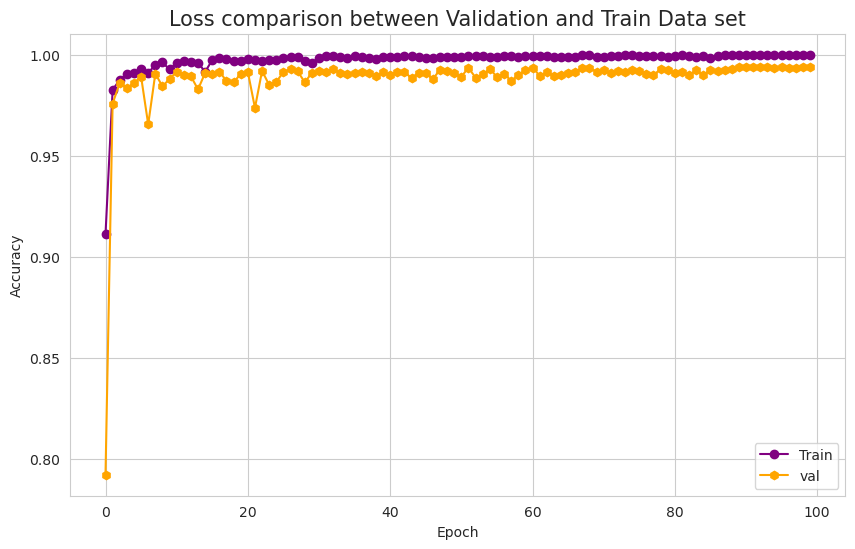

313/313 [==============================] - 3s 8ms/step - loss: 0.0664 - categorical_accuracy: 0.9942
[0.06638304889202118, 0.9941999912261963]


In [11]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['categorical_accuracy'],color="Purple",marker='o')
plt.plot(m3.history['val_categorical_accuracy'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='best')
plt.show()
print(resnet.evaluate(X_test,y_test))